Proposal codes

In [14]:
library(tidyverse)
library(readxl)
library(ggplot2)
library(gridExtra)
library(repr)
#install.packages("psych")
library(psych)
library(GGally)

In [45]:
# show data can be read
options(repr.plot.width = 15, repr.plot.height = 10)

train_data <- read_excel("Data_User.xls", sheet="Training_Data") |>
              select(STG:UNS)
test_data <- read_excel("Data_User.xls", sheet="Test_Data") |>
              select(STG:UNS)


#tidy data: turn UNS into factors in both sets of data, then turn to numeric levels starting at 1 for very_low
#clean and wrangle data
#turn class levels to 1,2,3,4 (very low, low, middle, high)
train_data_cleaned<- train_data |>
mutate(UNS = factor(as.factor(UNS), levels=(rev(levels(as.factor(UNS)))))) |>
mutate(UNS = as.numeric(UNS)) 

test_data_cleaned <- test_data |>
mutate(UNS = factor(as.factor(UNS), levels=(rev(levels(as.factor(UNS)))))) |>
mutate(UNS = as.factor(as.numeric(UNS)))

class(train_data_cleaned$UNS)
head(train_data)
head(train_data_cleaned)

New names:
• `` -> `...7`
• `` -> `...8`
New names:
• `` -> `...7`
• `` -> `...8`


[1] "numeric"

STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.00,0.00,0.00,0.00,0.00,very_low
0.08,0.08,0.10,0.24,0.90,High
0.06,0.06,0.05,0.25,0.33,Low
0.10,0.10,0.15,0.65,0.30,Middle
0.08,0.08,0.08,0.98,0.24,Low
0.09,0.15,0.40,0.10,0.66,Middle


STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.00,0.00,0.00,0.00,0.00,1
0.08,0.08,0.10,0.24,0.90,4
0.06,0.06,0.05,0.25,0.33,3
0.10,0.10,0.15,0.65,0.30,2
0.08,0.08,0.08,0.98,0.24,3
0.09,0.15,0.40,0.10,0.66,2


In [ ]:
#Summary table for predictors in train-data
summary_pred_train <- describe(train_data[-6], fast=TRUE)
summary_pred_train

In [ ]:
#visualizing training data
# plots showing distribution of each predictor: 

prawSTG <- ggplot(train_data, aes(STG))+
geom_histogram(colour="black", fill="lightblue", bins=30)

prawSCG <- ggplot(train_data, aes(SCG))+
geom_histogram(colour="black", fill="lightblue")

prawSTR <- ggplot(train_data, aes(STR))+
geom_histogram(colour="black", fill="lightblue")

prawLPR <- ggplot(train_data, aes(LPR))+
geom_histogram(colour="black", fill="lightblue")

prawPEG <- ggplot(train_data, aes(PEG))+
geom_histogram(colour="black", fill="lightblue")

grid.arrange(prawSTG, prawSCG, prawSTR, prawLPR, prawPEG, ncol=3, top="Distribution of predictors")


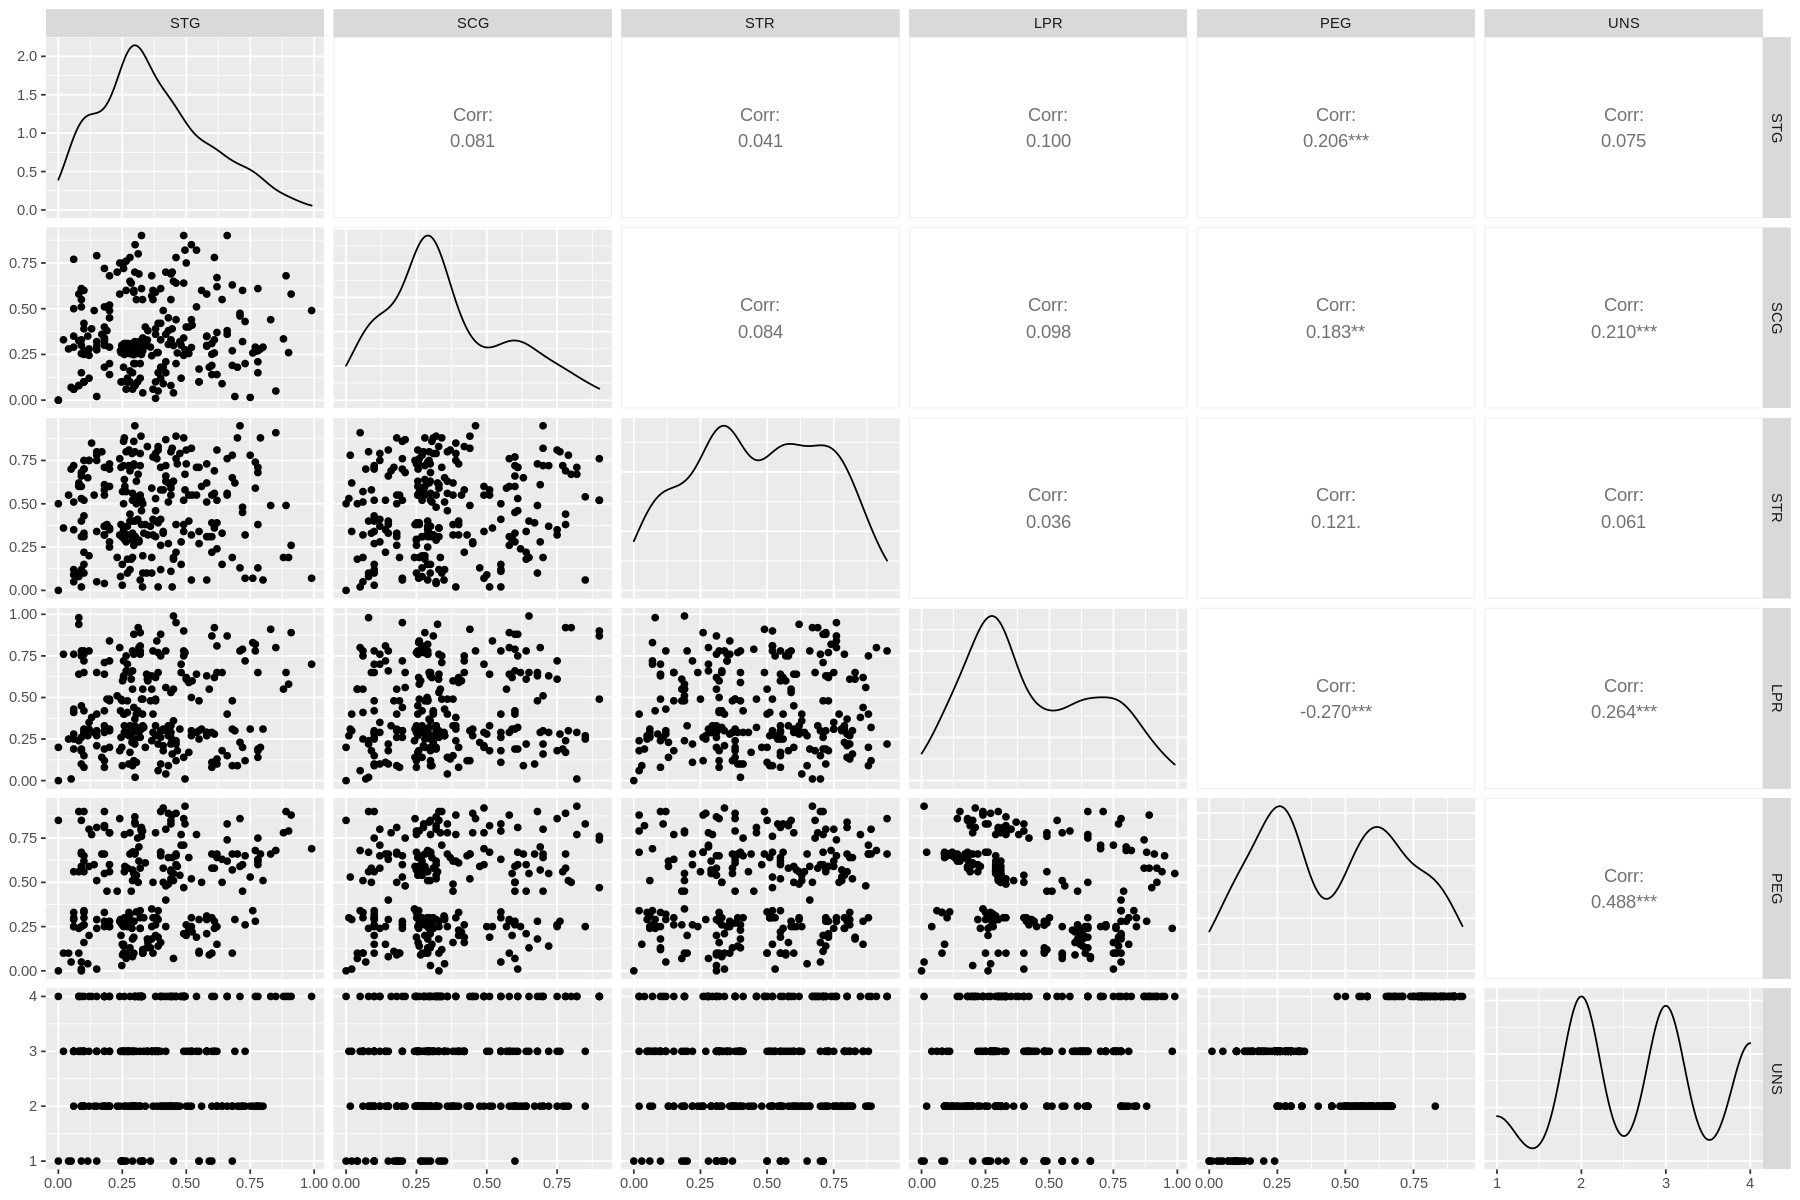

In [46]:
ggpairs(train_data_cleaned)

Choosing predictors: look at correlation between the predictors and UNS, we can see that PEG, LPR, and SCG have the highest correlations (absolute). Hence we think they might be the most influencial predictors. 